## Cargamos las librerias

In [1]:
import polars as pl 
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow

## Cargamos el conjunto de datos y eliminamos las columnas que no usaremos

In [2]:
spotify_data = pl.read_csv("playlist_2010to2022.csv")
spotify_data = spotify_data.drop(["playlist_url","track_id","artist_id","time_signature"])
spotify_data.head(5)

year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
i64,str,i64,str,str,str,i64,f64,f64,i64,f64,i64,f64,f64,f64,f64,f64,f64,i64
2001,"""Peaches & Crea…",66,"""Part III""","""112""","""pop""",64,0.677,0.52,4,-6.255,0,0.334,0.00277,0.0,0.0532,0.768,203.862,193093
2001,"""It's Over Now""",58,"""Part III""","""112""","""pop""",64,0.66,0.71,1,-4.541,1,0.0409,0.0106,0.000007,0.0736,0.233,97.988,264933
2000,"""Bye Bye Bye""",74,"""No Strings Att…","""NSYNC""","""pop""",65,0.61,0.926,8,-4.843,0,0.0479,0.031,0.0012,0.0821,0.861,172.638,200400
2000,"""It's Gonna Be …",71,"""No Strings Att…","""NSYNC""","""pop""",65,0.636,0.873,0,-4.672,0,0.071,0.0407,0.000001,0.0372,0.908,165.071,192427
2000,"""This I Promise…",68,"""No Strings Att…","""NSYNC""","""pop""",65,0.55,0.587,2,-6.279,1,0.0329,0.354,0.0,0.128,0.466,165.975,284760


## Ordenamos nuestro conjunto de datos por popularidad del artista

In [3]:
sort_spotify_data = spotify_data.sort("artist_popularity", descending = True)
sort_spotify_data.head()

year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
i64,str,i64,str,str,str,i64,f64,f64,i64,f64,i64,f64,f64,f64,f64,f64,f64,i64
2009,"""Love Story""",81,"""Fearless (Big …","""Taylor Swift""","""pop""",100,0.617,0.741,2,-3.97,1,0.0311,0.131,0.0,0.0772,0.306,118.984,236267
2009,"""You Belong Wit…",77,"""Fearless (Big …","""Taylor Swift""","""pop""",100,0.687,0.745,6,-4.432,1,0.0379,0.178,0.0000159,0.111,0.435,129.966,232120
2010,"""Back To Decemb…",68,"""Speak Now""","""Taylor Swift""","""pop""",100,0.529,0.67,2,-4.663,1,0.0303,0.117,0.0,0.334,0.286,141.893,293027
2010,"""Mine""",66,"""Speak Now""","""Taylor Swift""","""pop""",100,0.624,0.757,7,-2.94,1,0.0296,0.00265,0.000002,0.189,0.658,121.07,230707
2010,"""Today Was A Fa…",53,"""Today Was A Fa…","""Taylor Swift""","""pop""",100,0.491,0.703,7,-4.5,1,0.0319,0.0307,0.000006,0.167,0.344,157.988,242480


## ¿Cuáles son los artistas más escuchados?

In [4]:
top_artist = sort_spotify_data.group_by(["artist_name","artist_popularity"], maintain_order=True).agg(pl.count())
top_artist.head(10)

artist_name,artist_popularity,count
str,i64,u32
"""Taylor Swift""",100,31
"""Bad Bunny""",94,11
"""Drake""",94,32
"""The Weeknd""",94,15
"""Travis Scott""",93,6
"""KAROL G""",90,3
"""Kanye West""",89,18
"""Lana Del Rey""",89,7
"""Post Malone""",89,15


## ¿Cuáles son los artistas menos escuchados?

In [5]:
top_artist.tail(10)

artist_name,artist_popularity,count
str,i64,u32
"""Bodyrockers""",38,1
"""OPM""",38,1
"""Dirty Vegas""",37,1
"""Kandi""",36,1
"""Liberty X""",36,1
"""BBMAK""",35,1
"""DJ Pied Piper …",35,1
"""Holly Valance""",34,1
"""Rachel Stevens…",31,1


## ¿Cuáles son las canciones más escuchadas?

In [6]:
sort_spotify_data_track = spotify_data.sort("track_popularity", descending = True)

In [7]:
top_songs = sort_spotify_data_track.select(["artist_name","track_name","track_popularity"]).filter(pl.col("track_popularity")  <= 100)
top_songs.head(10)

artist_name,track_name,track_popularity
str,str,i64
"""Taylor Swift""","""Cruel Summer""",100
"""David Guetta""","""I'm Good (Blue…",93
"""Taylor Swift""","""august""",93
"""Taylor Swift""","""Anti-Hero""",93
"""OneRepublic""","""I Ain't Worrie…",92
"""Rema""","""Calm Down (wit…",92
"""The Weeknd""","""Starboy""",92
"""The Weeknd""","""Blinding Light…",92
"""Bizarrap""","""Quevedo: Bzrp …",91


## ¿Cuáles son las canciones menos escuchadas? 

In [8]:
top_songs.tail(10)

artist_name,track_name,track_popularity
str,str,i64
"""Billie Eilish""","""Your Power""",1
"""Black Eyed Pea…","""Shut Up""",1
"""Ariana Grande""","""positions""",0
"""BLACKPINK""","""How You Like T…",0
"""BTS""","""Dynamite""",0
"""BTS""","""ON (Feat. Sia)…",0
"""Fatman Scoop""","""Be Faithful""",0
"""Lorde""","""Solar Power""",0
"""Machine Gun Ke…","""my ex's best f…",0


In [9]:
top_genres = sort_spotify_data.group_by(["artist_genres"], maintain_order=True).agg(pl.count())
top_genres = top_genres.sort("count", descending = True)
top_genres = top_genres.with_columns(
    ((pl.col("count") / 2300) * 100).round(2).alias("porcentaje")
)
top_genres.head(19)

artist_genres,count,porcentaje
str,u32,f64
"""pop""",556,24.17
"""dance pop""",252,10.96
"""rap""",137,5.96
"""hip hop/rap""",126,5.48
"""hip hop""",109,4.74
"""r&b""",104,4.52
"""pop rap""",68,2.96
"""trap""",64,2.78
"""pop rock""",60,2.61


In [10]:
top_20_genres = top_genres[0:19]
alt.Chart(top_20_genres).mark_arc().encode(
    theta="porcentaje",
    color="artist_genres"
)


alt.Chart(...)

## ¿Existe correlaciones?

In [11]:
sopotify = pd.read_csv("playlist_2010to2022.csv")
sopotify_heatmap = sopotify.dropna()
sopotify_heatmap = sopotify_heatmap.select_dtypes(include=['float64', 'int64']).corr()

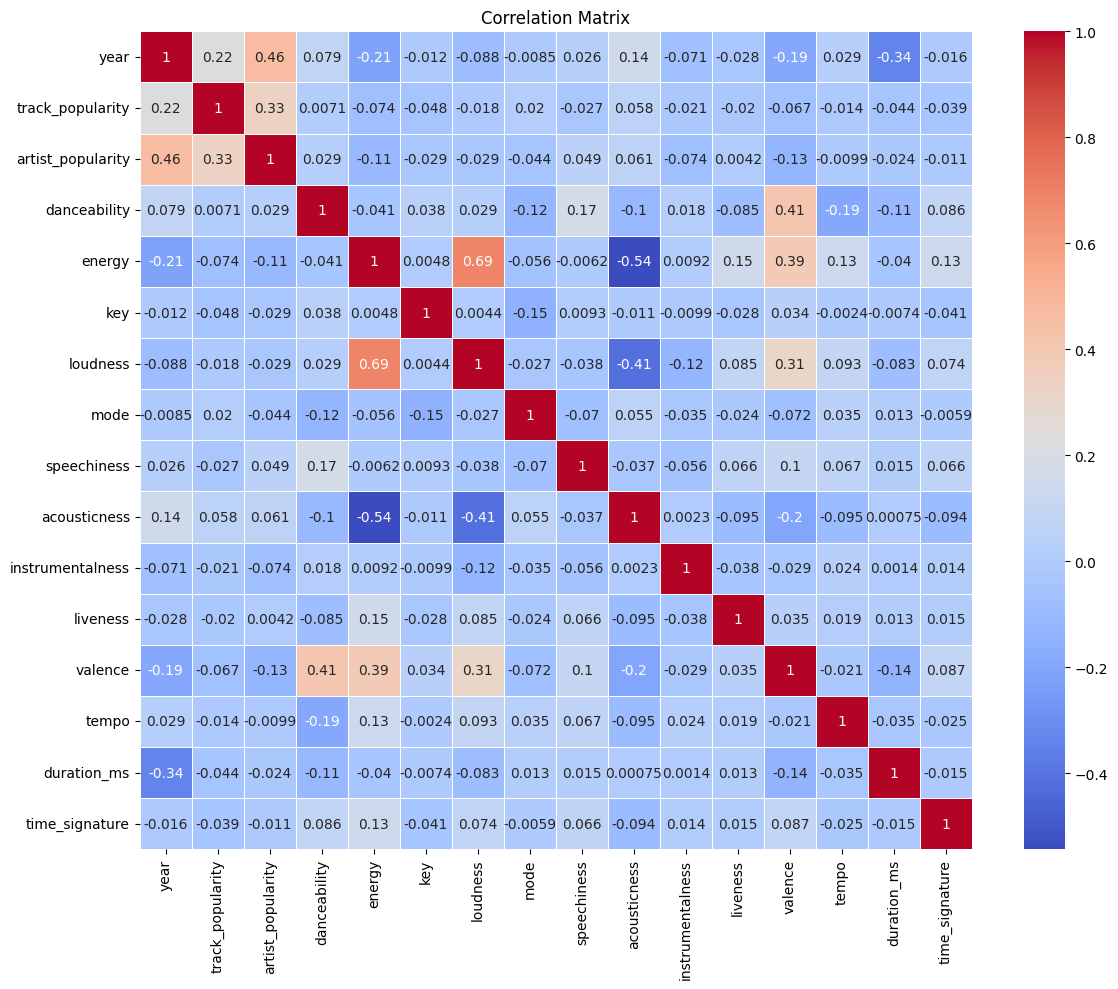

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(sopotify_heatmap, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()